In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd
import networkx as nx

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

from datetime import datetime

Define some column name lists.

In [3]:
ideal_cols = ['samp_name','samp_id','samp_location','samp_date','samp_time','cbga','cbg','thcaI','thcaII','avg_thca','thca4c','thcva',
              'd9thcI','d9thcII','avg_d9thc','d8thc','thcv','cbna','cbn','cbda','cbdva','cbd','cbdv','cbca','cbc','cbla']

chem_cols = ['cbga', 'cbg', 'thcaI', 'thcaII', 'thca4c', 'thcva', 'd9thcI', 'd9thcII', 'd8thc', 'thcv', 'cbna', 'cbn',
            'cbda', 'cbdva', 'cbd', 'cbdv', 'cbca', 'cbc', 'cbla']

final_cols = ['cbga','cbg','avg_thca','thca4c','thcva','avg_d9thc','d8thc','thcv','cbna','cbn','cbda','cbdva','cbd','cbdv','cbca','cbc','cbla']

Read in the data.

In [4]:
df = pd.read_csv('keegan_vergara_05022019.csv',parse_dates=['samp_date','samp_date_clean'])
print(len(df))
df.head()

17612


,samp_name,samp_id,samp_location,samp_date,samp_time,cbga,cbg,thcaI,thcaII,avg_thca,thca4c,thcva,d9thcI,d9thcII,avg_d9thc,d8thc,thcv,cbna,cbn,cbda,cbdva,cbd,cbdv,cbca,cbc,cbla,source_file,comb_cbg,comb_thc,comb_thcv,comb_cbc,comb_cbd,comb_cbdv,comb_cbn,samp_date_clean,samp_year
0,Batch,1387-R1,Colorado,2014-09-20,12:14:00,NaN,NaN,NaN,0.0461,0.04610,NaN,NaN,0.0464,0.0896,0.06800,0.0598,NaN,NaN,NaN,0.0172,NaN,NaN,NaN,NaN,0.0944,NaN,DEN.csv,NaN,0.108568,NaN,0.094400,0.015136,NaN,NaN,2014-09-20,2014
1,Frosty Kush,1001-12,California,2011-12-17,10:08:56,0.4401,0.1029,15.1366,15.4349,15.28575,0.0365,NaN,1.1851,1.0984,1.14175,NaN,NaN,0.0204,0.2212,0.0917,NaN,0.1184,NaN,0.0891,0.0092,0.0777,Halent Data From Travis.xlsx,0.490188,14.593210,NaN,0.087608,0.199096,NaN,0.239152,2011-12-17,2011
2,Cannatonic,1001-13,California,2011-12-17,10:52:33,0.2751,0.1977,0.7198,0.7351,0.72745,0.1181,NaN,0.1196,0.1186,0.11910,NaN,NaN,NaN,0.1687,21.3001,NaN,0.8088,NaN,0.3792,0.0770,NaN,Halent Data From Travis.xlsx,0.439788,0.759256,NaN,0.410696,19.552888,NaN,0.168700,2011-12-17,2011
3,Terpene Queen,1001-14,California,2011-12-17,12:19:48,0.0985,0.4257,4.1346,4.1908,4.16270,0.0533,NaN,1.4245,1.3010,1.36275,NaN,NaN,0.0089,NaN,14.2062,NaN,1.1433,NaN,0.1895,0.0407,0.1953,Halent Data From Travis.xlsx,0.512380,5.025926,NaN,0.207460,13.644756,NaN,0.007832,2011-12-17,2011
4,Pineapple Purps,1001-15,California,2011-12-22,15:19:57,0.5639,0.0481,8.0381,8.1774,8.10775,0.0263,NaN,0.2541,0.2255,0.23980,NaN,NaN,0.0039,NaN,0.0375,NaN,0.1207,NaN,0.0304,0.0102,NaN,Halent Data From Travis.xlsx,0.544332,7.374620,NaN,0.036952,0.153700,NaN,0.003432,2011-12-22,2011


Missing data?

In [5]:
nan_df = df.replace({-1:np.nan,0:np.nan})
missing_features = (nan_df.isnull().sum()/len(nan_df)).sort_values()
missing_features

samp_name          0.000000
source_file        0.000000
samp_date_clean    0.000000
samp_year          0.000000
samp_id            0.000000
samp_date          0.000000
samp_location      0.000000
avg_thca           0.012321
thcaI              0.012605
comb_thc           0.014592
samp_time          0.051953
comb_cbg           0.302805
cbda               0.325914
cbg                0.349421
comb_cbd           0.377924
cbga               0.544913
comb_cbn           0.620429
cbd                0.628208
comb_cbc           0.631331
cbca               0.662844
cbna               0.705258
thca4c             0.711617
cbla               0.750568
thcaII             0.769986
avg_d9thc          0.770725
d9thcI             0.771008
d9thcII            0.776800
cbc                0.782989
comb_thcv          0.811946
thcva              0.818192
cbn                0.875710
d8thc              0.922042
comb_cbdv          0.965989
cbdva              0.973825
thcv               0.978594
cbdv               0

Pre-process data for machine learning.

In [6]:
df[df.columns[-9:-2]].dropna(subset=['comb_thcv','comb_cbdv'])

,comb_cbg,comb_thc,comb_thcv,comb_cbc,comb_cbd,comb_cbdv,comb_cbn
3982,NaN,0.197401,0.076153,0.367034,10.221360,0.069416,NaN
4072,0.260102,13.829552,2.661540,0.106370,NaN,0.006840,NaN
4091,0.036987,19.336152,0.096586,0.045982,0.081447,0.005745,0.016853
4168,0.171534,19.841184,0.088574,0.091087,0.041901,0.007809,NaN
4202,1.681439,16.468936,0.148053,0.256844,0.084094,0.016266,NaN
4215,0.802702,14.883264,1.429572,0.294584,0.035713,0.047391,0.172379
4218,0.409611,11.427504,0.112781,0.090029,0.030915,0.025290,0.074793
4219,0.306400,3.080000,0.308000,0.148800,5.298000,0.193600,0.028160
4220,0.929819,12.339624,0.034094,0.110337,0.029913,0.028700,NaN
4222,2.060009,22.203104,1.739162,0.100818,0.052538,0.035531,0.025316


In [7]:
from sklearn.preprocessing import StandardScaler
X = df[df.columns[-9:-2]].fillna(-1)
X_standard = StandardScaler().fit_transform(X)

# Dimensionality reduction

### PCA

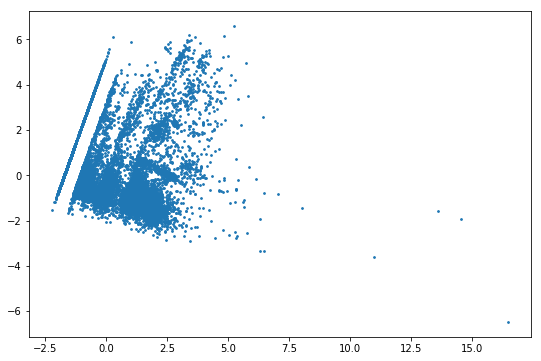

In [8]:
# Step 1: Choose your model class(es)
from sklearn.decomposition import PCA

# Step 2: Instantiate your model class(es)
pca = PCA(n_components = 2)

# Step 3: Arrange data into features matrices
# Done!

# Step 4: Fit the data and transform
X_pca = pca.fit_transform(X_standard)

# Plot the data
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_pca[:,0],X_pca[:,1],s=3)

### Isomap

### Multidimensional scaling

### Locally Linear Embedding

In [ ]:
# Step 1: Choose your model class(es)
from sklearn.manifold import LocallyLinearEmbedding

# Step 2: Instantiate your model class(es)
lle = LocallyLinearEmbedding(n_components = 2)

# Step 3: Arrange data into features matrices
# Done!

# Step 4: Fit the data and transform
X_lle = lle.fit_transform(X_standard)


# Plot the data
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_lle[:,0],X_lle[:,1])

### Spectral embedding

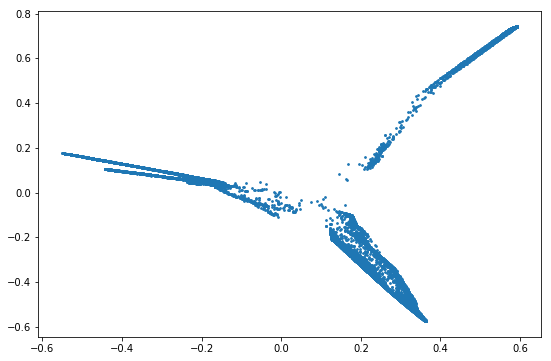

In [27]:
# Step 1: Choose your model class(es)
from sklearn.manifold import SpectralEmbedding

# Step 2: Instantiate your model class(es)
se = SpectralEmbedding(n_components = 2)

# Step 3: Arrange data into features matrices
# Done!

# Step 4: Fit the data and transform
X_se = se.fit_transform(X_standard)

# Plot the data
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_se[:,0],X_se[:,1],s=3)

### t-SNE

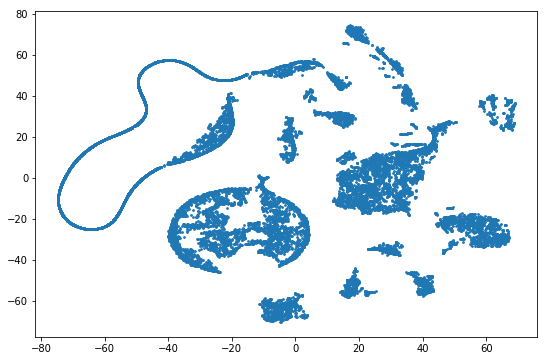

In [9]:
# Step 1: Choose your model class(es)
from sklearn.manifold import TSNE

# Step 2: Instantiate your model class(es)
tsne = TSNE(n_components = 2, perplexity=100, init='pca', random_state=42)

# Step 3: Arrange data into features matrices
# Done!

# Step 4: Fit the data and transform
X_tsne = tsne.fit_transform(X_standard)

# Plot the data
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_tsne[:,0],X_tsne[:,1],s=3)

### UMAP

/Users/briankeegan/anaconda/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


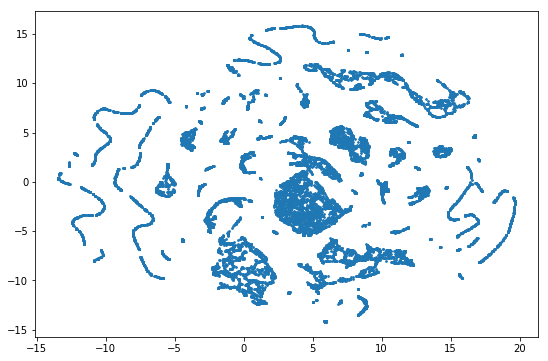

In [10]:
# Step 1: Choose your model class(es)
from umap import UMAP

# Step 2: Instantiate your model class(es)
umap_ = UMAP(n_components=2, n_neighbors=10, random_state=42)

# Step 3: Arrange data into features matrices
# Done!

# Step 4: Fit the data and transform
X_umap = umap_.fit_transform(X_standard)

# Plot the data
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_umap[:,0],X_umap[:,1],s=3)

# Clustering

### K-Means

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
sil_score = {}

for n in range(10,21):
    _model = KMeans(n_clusters=n)
    y = _model.fit_predict(X_tsne)
    sil_score[n] = silhouette_score(X_tsne,y)
    
_s = pd.Series(sil_score)
ax = _s.plot()
ax.set_xticks(range(2,21));
ax.set_ylim((0,1))
ax.axvline(_s.idxmax(),c='r',lw=3,alpha=.1)
print(_s.idxmax())

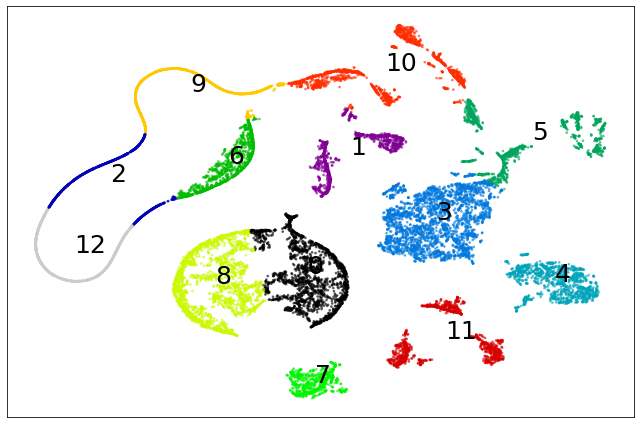

In [13]:
# Compute clusters
kmeans_tsne_clusters = KMeans(n_clusters=13)
kmeans_tsne_clusters.fit(X_tsne)
y_kmeans_tsne_clusters = kmeans_tsne_clusters.predict(X_tsne)

# Visualize
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans_tsne_clusters, cmap='nipy_spectral',alpha=.5,s=3)
ax.grid(None)

for cluster in range(kmeans_tsne_clusters.n_clusters):
    plt.annotate(str(cluster), 
                 (kmeans_tsne_clusters.cluster_centers_[cluster, 0], kmeans_tsne_clusters.cluster_centers_[cluster, 1]),
                 size=25
                );
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
f.tight_layout()
f.savefig('tsne_kmeans.pdf')

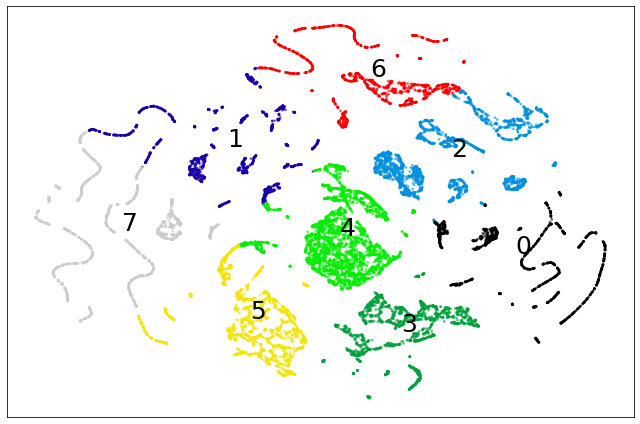

In [14]:
# Compute clusters
kmeans_umap_clusters = KMeans(n_clusters=8)
kmeans_umap_clusters.fit(X_umap)
y_kmeans_umap_clusters = kmeans_umap_clusters.predict(X_umap)

# Visualize
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y_kmeans_umap_clusters, cmap='nipy_spectral',alpha=.5,s=3)
ax.grid(None)

for cluster in range(kmeans_umap_clusters.n_clusters):
    plt.annotate(str(cluster), 
                 (kmeans_umap_clusters.cluster_centers_[cluster, 0], kmeans_umap_clusters.cluster_centers_[cluster, 1]),
                 size=25
                );
    
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
f.tight_layout()
f.savefig('umap_kmeans.pdf')

### Gaussian Mixture

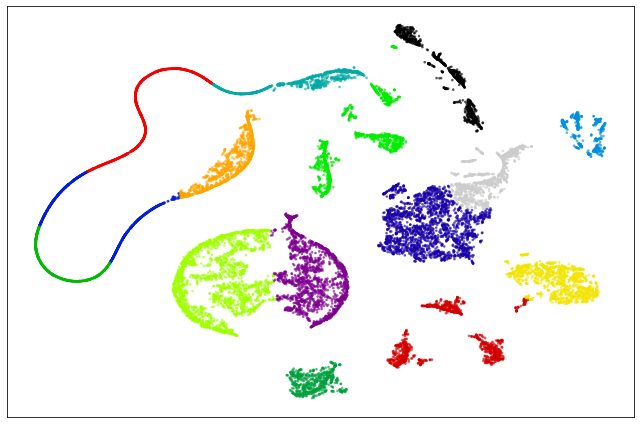

In [15]:
from sklearn.mixture import GaussianMixture

# Compute clusters
gmm_tsne_clusters = GaussianMixture(n_components=15)
gmm_tsne_clusters.fit(X_tsne)
y_gmm_tsne_clusters = gmm_tsne_clusters.predict(X_tsne)

# Visualize
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_gmm_tsne_clusters, cmap='nipy_spectral',alpha=.5,s=3)
ax.grid(None)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
f.tight_layout()
f.savefig('tsne_gmm.pdf')

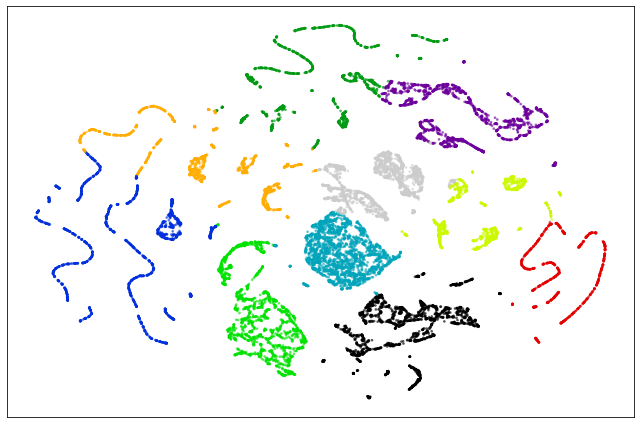

In [16]:
# Compute clusters
gmm_umap_clusters = GaussianMixture(n_components=10)
gmm_umap_clusters.fit(X_umap)
y_gmm_umap_clusters = gmm_umap_clusters.predict(X_umap)

# Visualize
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y_gmm_umap_clusters, cmap='nipy_spectral',alpha=.5,s=3)
ax.grid(None)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
f.tight_layout()
f.savefig('umap_gmm.pdf')

### DBSCAN

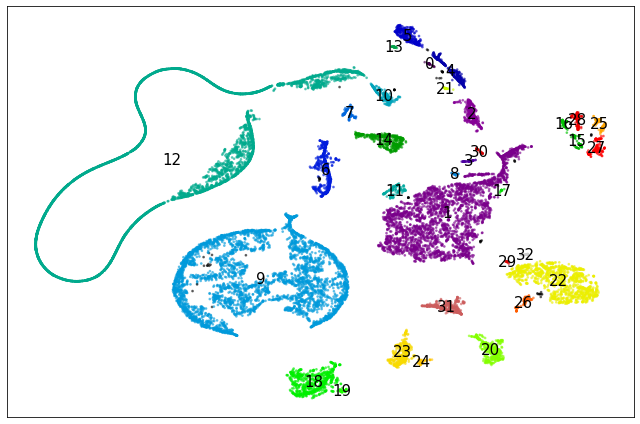

In [17]:
from sklearn.cluster import DBSCAN

# Compute clusters
dbscan_tsne_clusters = DBSCAN(eps=1.5,min_samples=10,n_jobs=-1)
y_dbscan_tsne_clusters = dbscan_tsne_clusters.fit_predict(X_tsne)

cluster_df = df.copy()
cluster_df['tsne_dbscan_cluster'] = y_dbscan_tsne_clusters
cluster_df['tsne_dbscan_x'] = X_tsne[:,0]
cluster_df['tsne_dbscan_y'] = X_tsne[:,1]

# Visualize
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_dbscan_tsne_clusters, cmap='nipy_spectral',alpha=.5,s=3)
ax.grid(None)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

for cluster in list(set(dbscan_tsne_clusters.labels_)):
    if cluster > -1:
        _centroid = cluster_df.loc[cluster_df['tsne_dbscan_cluster'] == cluster,['tsne_dbscan_x','tsne_dbscan_y']].mean().values
        ax.annotate(str(cluster), (_centroid[0], _centroid[1]),size=15,va='center',ha='center');

f.tight_layout()
f.savefig('tsne_dbscan.pdf')

77


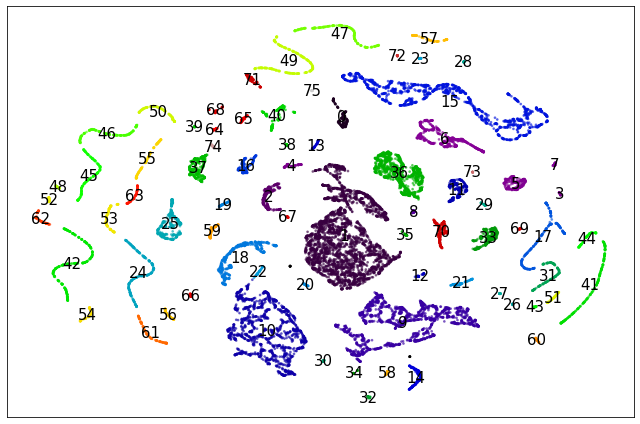

In [18]:
# Compute clusters
dbscan_umap_clusters = DBSCAN(eps=.5,min_samples=10,n_jobs=-1)
y_dbscan_umap_clusters = dbscan_umap_clusters.fit_predict(X_umap)
print(len(set(y_dbscan_umap_clusters)))

cluster_df['umap_dbscan_cluster'] = y_dbscan_umap_clusters
cluster_df['umap_dbscan_x'] = X_umap[:,0]
cluster_df['umap_dbscan_y'] = X_umap[:,1]
cluster_df.to_csv('!deduplicated_clusters.csv',encoding='utf8')

# Visualize
f,ax = plt.subplots(1,1,figsize=(9,6))
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y_dbscan_umap_clusters, cmap='nipy_spectral',alpha=.5,s=3)
ax.grid(None)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

for cluster in list(set(dbscan_umap_clusters.labels_)):
    if cluster > -1:
        _centroid = cluster_df.loc[cluster_df['umap_dbscan_cluster'] == cluster,['umap_dbscan_x','umap_dbscan_y']].mean().values
        ax.annotate(str(cluster), (_centroid[0], _centroid[1]),size=15,va='center',ha='center');

f.tight_layout()
f.savefig('umap_dbscan.pdf')

## Write cluster identities out to file

## Are clusters trivial?

Are there different clusters simply because of missing data?

In [16]:
df['dbscan_tsne'] = y_dbscan_tsne_clusters
df['dbscan_umap'] = y_dbscan_umap_clusters

In [17]:
missing_features

samp_name          0.000000
samp_id            0.000000
samp_date          0.000000
source_file        0.000000
avg_thca           0.010882
thcaI              0.011114
samp_location      0.145229
samp_date_clean    0.145275
samp_year          0.145275
samp_time          0.189779
cbda               0.295294
cbg                0.311942
cbga               0.484189
cbd                0.601562
cbca               0.614444
cbna               0.650763
thcaII             0.657831
avg_d9thc          0.658761
d9thcI             0.659133
d9thcII            0.664342
thca4c             0.666295
cbla               0.718099
thcva              0.738421
cbc                0.739211
cbn                0.877744
d8thc              0.892020
thcv               0.949498
cbdva              0.971819
cbdv               0.986235
dtype: float64

In [62]:
df.head()

,samp_name,samp_id,samp_location,samp_date,samp_time,cbga,cbg,thcaI,thcaII,avg_thca,thca4c,thcva,d9thcI,d9thcII,avg_d9thc,d8thc,thcv,cbna,cbn,cbda,cbdva,cbd,cbdv,cbca,cbc,cbla,source_file,samp_date_clean,samp_year,dbscan_tsne,dbscan_umap
0,Batch,-1387-R01,Colorado,2014-09-20,12:14:00,-1.0000,0.0000,0.0000,0.0461,0.02305,-1.0000,-1.0,0.0464,0.0896,0.06800,0.0598,-1.0,-1.0000,0.0000,0.0172,-1.0,0.0000,0.0,-1.0000,0.0944,-1.0000,DEN.csv,2014-09-20,2014.0,0,0
1,Frosty Kush,1001-12,California,2011-12-17,10:08:56,0.4401,0.1029,15.1366,15.4349,15.28575,0.0365,-1.0,1.1851,1.0984,1.14175,0.0000,-1.0,0.0204,0.2212,0.0917,-1.0,0.1184,-1.0,0.0891,0.0092,0.0777,Halent Data From Travis.xlsx,2011-12-17,2011.0,1,1
2,Cannatonic,1001-13,California,2011-12-17,10:52:33,0.2751,0.1977,0.7198,0.7351,0.72745,0.1181,-1.0,0.1196,0.1186,0.11910,0.0000,-1.0,0.0000,0.1687,21.3001,-1.0,0.8088,-1.0,0.3792,0.0770,0.0000,Halent Data From Travis.xlsx,2011-12-17,2011.0,2,2
3,Terpene Queen,1001-14,California,2011-12-17,12:19:48,0.0985,0.4257,4.1346,4.1908,4.16270,0.0533,-1.0,1.4245,1.3010,1.36275,0.0000,-1.0,0.0089,0.0000,14.2062,-1.0,1.1433,-1.0,0.1895,0.0407,0.1953,Halent Data From Travis.xlsx,2011-12-17,2011.0,2,3
4,Pineapple Purps,1001-15,California,2011-12-22,15:19:57,0.5639,0.0481,8.0381,8.1774,8.10775,0.0263,-1.0,0.2541,0.2255,0.23980,0.0000,-1.0,0.0039,0.0000,0.0375,-1.0,0.1207,-1.0,0.0304,0.0102,0.0000,Halent Data From Travis.xlsx,2011-12-22,2011.0,1,1


In [63]:
agg_d = {'avg_thca':np.mean,'cbda':np.mean,'cbg':np.mean,'cbd':np.mean,'cbna':np.mean,
         'samp_location':set,'samp_year':set,'dbscan_tsne':len,'source_file':set,'samp_name':set}
df.groupby('dbscan_tsne').agg(agg_d).rename(columns={'dbscan_tsne':'count'}).sort_values('avg_thca',ascending=False)

,avg_thca,cbda,cbg,cbd,cbna,samp_location,samp_year,count,source_file,samp_name
dbscan_tsne,,,,,,,,,,
31,26.181720,0.000000,0.000000,0.000000,-1.000000,{California},"{2017.0, 2018.0}",10,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Sun Purple Sour Diesel, Indoor OG Sour, Lemon..."
28,20.637017,0.049632,0.005970,0.001115,-1.000000,{California},"{2017.0, 2018.0}",281,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Graddaddy Purple, Gorilla Glue Shake, Blue Dy..."
18,20.602142,0.012312,0.165623,0.006235,-1.000000,{Washington},{2014.0},249,{SEA.xlsx},"{US Indica 15, US Hybrid 10, Indica 13, Royal ..."
15,20.211841,0.031098,0.158103,0.083836,-1.000000,{nan},"{nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",118,{Daniela Dataset Ver03.xlsx},"{Old Amsterdam, Dead Head OG, Shark Shock, Bru..."
26,20.170286,0.051531,0.039380,0.350070,-1.000000,{California},"{2017.0, 2018.0}",37,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Purple Sherbert, Flow X White C, Sweet Tooth,..."
40,19.369968,0.041864,0.243565,0.000000,-1.000000,{California},{2018.0},37,{tc-2018-06-26.csv},"{Catholic School Girl, Chemmy, Grapefruit Bana..."
37,19.192588,0.078530,0.197503,0.006933,-1.000000,{California},"{2017.0, 2018.0}",350,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{A1, Pearl 2, Gorilla Glue #4, Pearl 1, 5824-0..."
38,18.972561,0.041821,0.210398,0.023343,-1.000000,{California},"{2017.0, 2018.0}",28,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Tangelo, Sample 1 9-1-2017, Lemonder, Skunk #..."
21,18.883575,-0.031158,-1.000000,-0.182294,-1.000000,"{New Mexico, California}","{2017.0, 2018.0}",2404,"{LIMS database dump_2017-05-05.csv, berkeley t...","{GrandDaddyPurp, Black Lime (GH), Tangled, BLA..."


In [64]:
df.groupby('dbscan_umap').agg(agg_d).rename(columns={'dbscan_tsne':'count'}).sort_values('avg_thca',ascending=False)

,avg_thca,cbda,cbg,cbd,cbna,samp_location,samp_year,count,source_file,samp_name
dbscan_umap,,,,,,,,,,
59,67.086510,0.107584,0.817891,0.340798,0.069879,{California},"{2017.0, 2018.0, 2015.0}",20,"{flower_export.csv, hplcresults_jeremy_01_2015...","{QM 287, QM 281, QM 297, QM 298, Bubble Hash -..."
52,35.149150,0.078131,0.138886,0.036182,-1.000000,"{Hawaii, California}","{2017.0, 2018.0}",58,"{LIMS database dump_2017-05-05.csv, LIMS Data ...","{Black Jack Frost, H 393, QC 29, Croketts Dogg..."
55,26.879309,0.011678,0.001657,0.010884,-1.000000,{California},"{2017.0, 2018.0}",23,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{THC Only Loud Scout, LA Confidential, Gorilla..."
51,26.058436,0.011269,0.000000,0.000000,-1.000000,{California},"{2017.0, 2018.0}",14,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{#10 Larry Lemon, Rare Darkness, #5 Key Lime P..."
43,25.003140,0.008598,0.000000,0.000000,-1.000000,{California},"{2017.0, 2018.0}",68,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{White Buffalo Sample 2, Critical Jack, Cherry..."
54,24.258991,0.006713,0.000000,0.000000,-1.000000,{California},"{2017.0, 2018.0}",22,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Flower #1, White Fire OG #5, Gorilla Glue #4 ..."
41,23.998625,0.000000,0.000000,0.000000,-1.000000,{California},"{2017.0, 2018.0}",20,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Gorilla Glue Sample 3, Deb Diesel, Sour Grape..."
57,23.831700,0.011456,0.000000,0.000000,-1.000000,{California},"{2017.0, 2018.0}",10,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Sour Kosher, #9 Candyland, Green Crack, #8 Ge..."
48,22.888009,0.012518,0.000000,0.012339,-1.000000,{California},"{2017.0, 2018.0}",144,"{LIMS Data dump_2017-07-06.csv, tc-2018-06-26....","{Old Amsterdam, #2 Pink Candy, Lemon Sugar, QC..."


In [61]:
df[df['dbscan_umap'] == 59]

,samp_name,samp_id,samp_location,samp_date,samp_time,cbga,cbg,thcaI,thcaII,avg_thca,thca4c,thcva,d9thcI,d9thcII,avg_d9thc,d8thc,thcv,cbna,cbn,cbda,cbdva,cbd,cbdv,cbca,cbc,cbla,source_file,samp_date_clean,samp_year,dbscan_tsne,dbscan_umap
7709,QM 278,BK18317,California,2017-01-01,00:00:00,0.000000,0.000000,66.9514,-1.0,66.9514,0.000000,0.000000,-1.0,-1.0,NaN,0.000000,0.000000,0.142970,0.000000,0.000000,0.0,0.00000,0.0,0.218682,0.289676,0.000000,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7711,QM 281,BK18320,California,2017-01-01,00:00:00,1.072900,1.776990,90.8033,-1.0,90.8033,0.000000,1.405550,-1.0,-1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.282367,0.000000,0.000000,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7712,QM 292,BK18321,California,2017-01-01,00:00:00,2.229090,0.000000,73.9369,-1.0,73.9369,0.000000,0.000000,-1.0,-1.0,NaN,0.000000,0.000000,0.077433,0.000000,0.863850,0.0,0.00000,0.0,0.293262,0.000000,1.181390,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7713,QM 290,BK18322,California,2017-01-01,00:00:00,1.195710,0.921410,77.7175,-1.0,77.7175,0.000000,1.012470,-1.0,-1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.066300,0.0,0.00000,0.0,0.272857,0.000000,0.871923,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7714,QM 287,BK18323,California,2017-01-01,00:00:00,3.332650,1.017120,82.0070,-1.0,82.0070,0.000000,1.776600,-1.0,-1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7715,QM 289,BK18324,California,2017-01-01,00:00:00,1.815280,1.441870,48.8129,-1.0,48.8129,0.000000,1.418410,-1.0,-1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7716,QM 286,BK18325,California,2017-01-01,00:00:00,1.857810,1.371550,80.5699,-1.0,80.5699,0.000000,1.384040,-1.0,-1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.066682,0.0,0.00000,0.0,0.329006,0.000000,1.488580,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7726,QM 291,BK18335,California,2017-01-01,00:00:00,0.000000,0.000000,62.3675,-1.0,62.3675,0.000000,3.964320,-1.0,-1.0,NaN,0.000000,0.000000,0.137393,0.000000,0.000000,0.0,0.00000,0.0,0.329701,0.000000,1.255130,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7727,QM 300,BK18336,California,2017-01-01,00:00:00,0.785789,1.153350,48.9455,-1.0,48.9455,0.000000,1.183910,-1.0,-1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,1.148280,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59
7731,QM 297,BK18341,California,2017-01-01,00:00:00,0.000000,0.000000,70.8167,-1.0,70.8167,0.000000,0.000000,-1.0,-1.0,NaN,0.000000,0.000000,0.055202,0.000000,0.000000,0.0,0.00000,0.0,0.155460,0.000000,0.704729,LIMS Data dump_2017-07-06.csv,2017-01-01,2017.0,25,59


## Interpolate missing data?

In [65]:
df.groupby(['samp_location']).agg({'avg_thca':np.mean})

,avg_thca
samp_location,
Alaska,16.573950
California,15.639406
Colorado,15.600970
Hawaii,33.343300
New Mexico,26.585750
Washington,20.002581


/Users/briankeegan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/briankeegan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


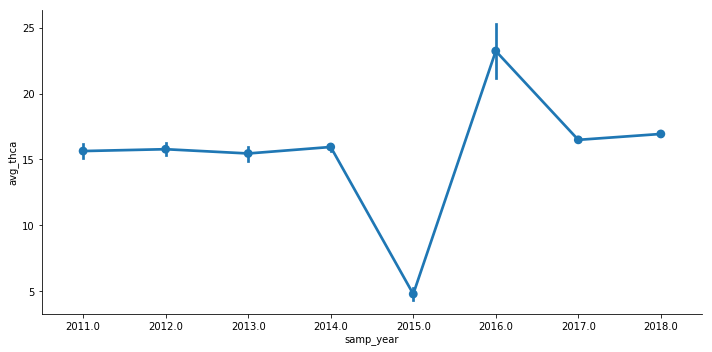

In [72]:
sb.factorplot(x='samp_year',y='avg_thca',kind='point',data=df,aspect=2)

/Users/briankeegan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/briankeegan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


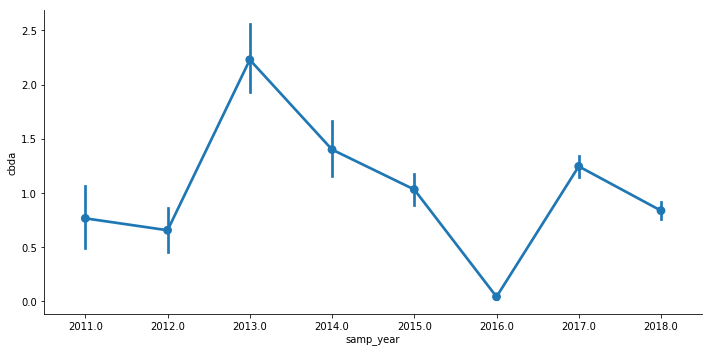

In [103]:
sb.factorplot(x='samp_year',y='cbda',kind='point',data=df[df['samp_location']=='California'],aspect=2)

/Users/briankeegan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/briankeegan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


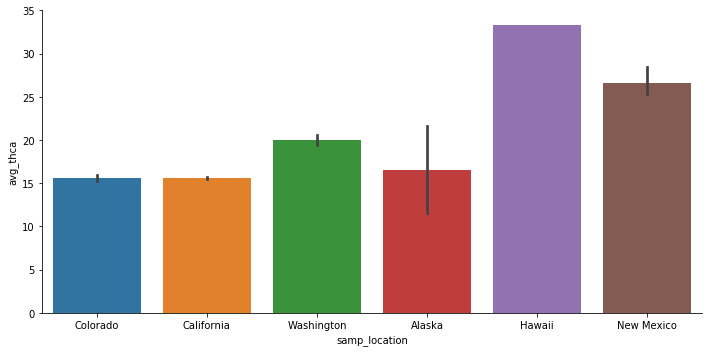

In [81]:
sb.factorplot(x='samp_location',y='avg_thca',kind='bar',data=df,aspect=2)

In [89]:
agg_d2 = {'samp_name':pd.Series.nunique,'samp_id':len,'avg_thca':np.mean}
ix = pd.MultiIndex.from_product([['Alaska','California','Colorado','Hawaii','New Mexico','Washington'],range(2011,2019)])
table_df = df.groupby(['samp_location','samp_year']).agg(agg_d2).reindex(ix).fillna(0)
table_df

samp_name  samp_id   avg_thca
Alaska     2011        0.0      0.0   0.000000
           2012        0.0      0.0   0.000000
           2013        0.0      0.0   0.000000
           2014        0.0      0.0   0.000000
           2015        0.0      0.0   0.000000
           2016        0.0      0.0   0.000000
           2017        2.0      2.0  16.573950
           2018        0.0      0.0   0.000000
California 2011      279.0    363.0  15.634264
           2012      435.0    595.0  15.773862
           2013      738.0    830.0  15.450390
           2014     1076.0   1413.0  15.454436
           2015      951.0   1209.0   4.779325
           2016        5.0      5.0  23.227960
           2017     4467.0   6130.0  16.475908
           2018     3848.0   6517.0  16.932338
Colorado   2011        0.0      0.0   0.000000
           2012        0.0      0.0   0.000000
           2013        0.0      0.0   0.000000
           2014      681.0   1052.0  15.600970
           2015        0.0      0.0   0.000000
           2016        0.0      0.0   0.000000
           2017        0.0      0.0   0.000000
           2018        0.0      0.0   0.000000
Hawaii     2011        0.0      0.0   0.000000
           2012        0.0      0.0   0.000000
           2013        0.0      0.0   0.000000
           2014        0.0      0.0   0.000000
           2015        0.0      0.0   0.000000
           2016        0.0      0.0   0.000000
           2017        1.0      1.0  33.343300
           2018        0.0      0.0   0.000000
New Mexico 2011        0.0      0.0   0.000000
           2012        0.0      0.0   0.000000
           2013        0.0      0.0   0.000000
           2014        0.0      0.0   0.000000
           2015        0.0      0.0   0.000000
           2016        0.0      0.0   0.000000
           2017        4.0      4.0  26.585750
           2018        0.0      0.0   0.000000
Washington 2011        0.0      0.0   0.000000
           2012        0.0      0.0   0.000000
           2013        0.0      0.0   0.000000
           2014      169.0    259.0  20.002581
           2015        0.0      0.0   0.000000
           2016        0.0      0.0   0.000000
           2017        0.0      0.0   0.000000
           2018        0.0      0.0   0.000000

In [100]:
from scipy.stats import f_oneway, ttest_ind

_samp1 = df[(df['samp_location'] == 'California') & (df['samp_year'] == 2014)]['avg_thca'].dropna()
_samp2 = df[(df['samp_location'] == 'California') & (df['samp_year'] == 2018)]['avg_thca'].dropna()

ttest_ind(_samp1,_samp2)

Ttest_indResult(statistic=-7.326877086574729, pvalue=2.5904161330981764e-13)

# Analyze clusters

In [188]:
cluster_subdf = cluster_df[['samp_name','samp_location','samp_year','tsne_dbscan_cluster','umap_dbscan_cluster']]
cluster_agg_df = cluster_subdf.groupby('umap_dbscan_cluster').agg({'samp_location':len,'samp_name':lambda x:list(set(x))}).reset_index()
cluster_agg_df.rename(columns={'samp_location':'strain_count','samp_name':'names','umap_dbscan_cluster':'cluster'},inplace=True)
cluster_agg_df = cluster_agg_df.sort_values('strain_count',ascending=False)
cluster_agg_df.head(10)

,cluster,strain_count,names
14,13,4768,"[QC 286, LOG0312 2208 7605, Black Jack #2, Lem..."
28,27,2216,"[AK-47 GH, QC1212, QC1232, QC1868, QC2070, QC1..."
12,11,2026,"[Dosi Do (EX), PLC, #2, OG x Cookies, Red Drag..."
4,3,1944,"[GA, Ocean AC/DC, MOAB c2230, The Cave, Thunde..."
2,1,884,"[Chocolate Chunk, Purple Poison, Blackberry Ku..."
7,6,838,"[Candy Land, Candy Cotton Kush, J. Fruit, 80 D..."
10,9,774,"[Green Crack, Mango Kush, Blueberry Headband, ..."
35,34,658,"[Red Dragon - v352630, ancient og(indoor), Ath..."
5,4,523,"[QC1270, QC1783, OTTO, QC1068, Harlequin x Mim..."
43,42,415,"[Lemon Cake, Green Crack, Blueberry #2, Blackb..."


# Strain name-cluster network

In [100]:
cluster_df.loc[cluster_df['samp_name'].str.contains('Kush'),'umap_dbscan_cluster'].value_counts()

 13    251
 3     121
 11    115
 9     108
 1     102
 6      73
 27     64
 34     46
 42     36
 40     28
 28     25
 7      19
 16     14
 14     14
 22      9
 18      6
 38      6
 29      5
 25      4
 4       4
 12      4
-1       3
 23      3
 33      3
 35      3
 10      3
 8       2
 2       2
 19      2
 15      2
 20      2
 41      2
 17      1
 21      1
 24      1
 26      1
 43      1
Name: umap_dbscan_cluster, dtype: int64

In [189]:
cluster_strain_el = cluster_df.groupby(['samp_name','umap_dbscan_cluster']).agg({'samp_location':len})['samp_location'].reset_index()
cluster_strain_el.rename(columns={'samp_location':'strain_count','umap_dbscan_cluster':'cluster'},inplace=True)


_el = cluster_strain_el[cluster_strain_el['strain_count'] > 2].sort_values('strain_count',ascending=False)
g = nx.from_pandas_edgelist(_el,source='samp_name',target='cluster',edge_attr=['strain_count'],create_using=nx.DiGraph())
print("There are {0:,} nodes and {1:,} edges in the network".format(g.number_of_nodes(),g.number_of_edges()))
nx.write_gexf(g,'strain_cluster.gexf')

There are 520 nodes and 824 edges in the network


In [190]:
bg = nx.bipartite.weighted_projected_graph(g.to_undirected(),nodes = _el['samp_name'].unique())
print("There are {0:,} nodes and {1:,} edges in the full projected network".format(bg.number_of_nodes(),bg.number_of_edges()))

There are 489 nodes and 47,722 edges in the full projected network


In [191]:
from scipy import integrate

def extract_backbone(g, alpha):
    backbone_graph = nx.Graph()
    for node in g:
        k_n = len(g[node])
        if k_n > 1:
            sum_w = sum( g[node][neighbor]['weight'] for neighbor in g[node] )
            for neighbor in g[node]:
                edgeWeight = g[node][neighbor]['weight']
                pij = float(edgeWeight)/sum_w
                if (1-pij)**(k_n-1) < alpha: # equation 2
                    backbone_graph.add_edge( node,neighbor, weight = edgeWeight)
    return backbone_graph

In [192]:
filtered_edges = [(i,j,d) for (i,j,d) in bg.edges(data=True) if d['weight'] > 1]
filtered_bg = nx.Graph()
filtered_bg.add_edges_from(filtered_edges)
print("There are {0:,} nodes and {1:,} edges in the filtered projected network".format(filtered_bg.number_of_nodes(),filtered_bg.number_of_edges()))
nx.write_gexf(filtered_bg,'strain_cluster_filtered_bg.gexf')

There are 144 nodes and 3,710 edges in the filtered projected network


In [193]:
filtered_edges = [(i,j,d) for (i,j,d) in bg.edges(data=True) if d['weight'] > 1]
backbone_bg = extract_backbone(bg,.1)

print("There are {0:,} nodes and {1:,} edges in the filtered projected network".format(backbone_bg.number_of_nodes(),backbone_bg.number_of_edges()))
nx.write_gexf(backbone_bg,'strain_cluster_backbone_bg.gexf')

There are 63 nodes and 596 edges in the filtered projected network
